# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.5.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957028 entries, 0 to 2957027
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 135.4+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
ordered_hp_df = hp_df.sort_values(by='year', ascending=False)
ordered_hp_df

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
count = 0
for year in movies['year']:
    if year >= 2000 and year <= 2018:
        count += 1

print(count)




114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False)]
hamlet_df

len(hamlet_df.title)

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
# sorted_df = hamlet_df.sort_values(by='title', ascending = False)
# sorted_df

df2 = movies[movies.title == 'Hamlet']
sorted_df2 = df2.sort_values(by='year', ascending=True)
sorted_df2


,title,year
181090,Hamlet,1910
124506,Hamlet,1911
118535,Hamlet,1913
46344,Hamlet,1921
73869,Hamlet,1948
140203,Hamlet,1954
155004,Hamlet,1964
222156,Hamlet,1969
218339,Hamlet,1973
8214,Hamlet,1976


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
inception_df = cast[cast.title == 'Inception']
inception_df

supporting_cast = inception_df['n'].isna().sum()
print(supporting_cast)

25


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
total_cast = len(inception_df['n'])

main_cast = total_cast - supporting_cast

print(main_cast)

40


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
sorted_df = inception_df.sort_values(by='n')

sorted_df.head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0
326745,Inception,2010,Michael Caine,actor,Miles,11.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
AD_df = cast[cast['character'] == 'Albus Dumbledore']
AD_df

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [23]:
names = AD_df['name'].unique()

print(names)



['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [29]:

# roles played in career:
KR_df = cast[cast.name == 'Keanu Reeves']
len(KR_df)

# leading roles played after 1999
sorted_KR_df = KR_df.sort_values(by='year')
filtered_KR_df = sorted_KR_df[(sorted_KR_df['year'] >= 1999) & (sorted_KR_df['n'] == 1)]

filtered_KR_df

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [30]:
sorted_cast = cast.sort_values(by='year')
sorted_cast

,title,year,name,type,character,n
482247,Miss Jerry,1894,William Courtenay,actor,Mr. Hamilton,NaN
576354,Miss Jerry,1894,Chauncey Depew,actor,Himself - the Director of the New York Central...,NaN
2612704,Miss Jerry,1894,Blanche Bayliss,actress,Miss Geraldine Holbrook (Miss Jerry),NaN
1782161,Soldiers of the Cross,1900,Reg Perry,actor,Lion,NaN
1782006,Soldiers of the Cross,1900,Orrie Perry,actor,Lion,NaN
...,...,...,...,...,...,...
2725134,Avatar 5,2025,Oona (II) Chaplin,actress,Varang,NaN
2482031,Avatar 5,2025,Sam Worthington,actor,Jake Sully,NaN
2516044,100 Years,2115,Marko Zaror,actor,Bad Guy,NaN
1415428,100 Years,2115,John Malkovich,actor,Hero,NaN


In [31]:
filtered_df = sorted_cast[(sorted_cast['year'] >= 1950) & (sorted_cast['year'] <= 1960)]

filtered_df
print(len(filtered_df['year']))

192842


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [32]:
# getting the data from 2000 - present
current_cast = cast[(cast['year'] >= 2000)]
present_cast = current_cast.sort_values(by='year', ascending=False)

# leading roles from 2000 - present (n=1)
leading_roles = len(present_cast[present_cast['n'] == 1])

# supporting roles (n >= 1), extras (n=NaN)
extras = present_cast['n'].isna().sum()
total_roles = len(present_cast['n'])
supporting_roles = total_roles - (extras + leading_roles)

# totals

print(leading_roles)
print(extras)
print(supporting_roles)
print(total_roles)

print(f"\nFrom 2000 - present, there were {total_roles} total roles,  of which {extras} were played \nby extras, {supporting_roles} were supporting characters, leaving {leading_roles} leading roles.")


48026
669569
757923
1475518

From 2000 - present, there were 1475518 total roles,  of which 669569 were played 
by extras, 757923 were supporting characters, leaving 48026 leading roles.


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [33]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<Axes: >

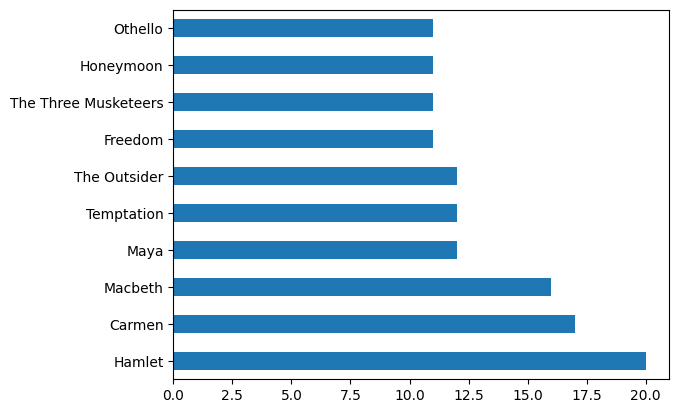

In [34]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [35]:
most_movies = movies['year'].value_counts().nlargest(3)

print(most_movies)

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<Axes: >

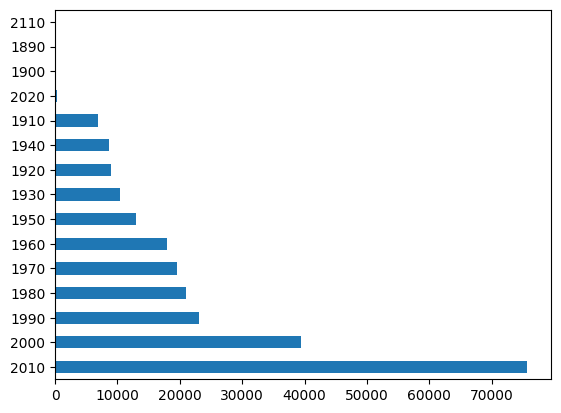

In [47]:
# adding a decade column
movies_decade = movies
movies_decade['decade'] = movies_decade.year / 10
movies_decade['decade'] = movies_decade['decade'].astype(int)
movies_decade['decade'] = movies_decade['decade'] * 10

# sorting by decade
sorted_movies = movies_decade.sort_values(by='decade')
sorted_movies

# films per decade
films_per_decade = sorted_movies['decade'].value_counts()

# plotting
films_per_decade.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [82]:
# most common character names
most_common_character_names = cast['character'].value_counts().nlargest(10)
most_common_character_names


Himself        20719
Extra           8484
Dancer          7461
Doctor          7100
Policeman       7022
Reporter        7013
Bartender       6173
Townsman        5874
Party Guest     5498
Student         5425
Name: character, dtype: int64

In [81]:
# sorting for herself 
herself_df = cast[(cast['character'] == "Herself")]

# finding the people most credited with herself
most_herself = herself_df['name'].value_counts().nlargest(10)

most_herself

Joyce Brothers         9
Hillary Clinton        8
Marta Berrocal         6
Estrella Borja         5
Paula (XI) Gonz?lez    4
Chris Evert            4
Corazon Aquino         4
Inday Badiday          4
Candie (III)           4
Brigitte Bardot        4
Name: name, dtype: int64

In [80]:
# sorted for himself
himself_df = cast[(cast['character'] == "Himself")]

# finding the people most credited with himself
most_himself = himself_df['name'].value_counts().nlargest(10)

most_himself

Adolf Hitler          99
Richard Nixon         44
Ronald Reagan         41
John F. Kennedy       37
George W. Bush        25
Winston Churchill     24
Martin Luther King    23
Bill Clinton          22
Ron Jeremy            22
Benito Mussolini      21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [88]:
zombie_count = cast.character.str.startswith('Zombie')
zombie_df = cast.loc[zombie_count]
most_zombies = zombie_df['character'].value_counts().nlargest(10)
most_zombies

Zombie                         4708
Zombie Horde                    141
Zombie - Protestor - Victim      64
Zombie Extra                     58
Zombie #1                        34
Zombie #2                        25
Zombie Dancer                    23
Zombie Vampire                   20
Zombie Victim                    17
Zombie 2                         16
Name: character, dtype: int64

In [89]:
police_count = cast.character.str.startswith('Police')
police_df = cast.loc[police_count]
most_police = police_df['character'].value_counts().nlargest(10)
most_police

Policeman              7022
Police Officer         4541
Police Inspector        734
Police Sergeant         669
Police officer          503
Police                  434
Police Chief            407
Police Captain          386
Police Commissioner     335
Police Detective        314
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

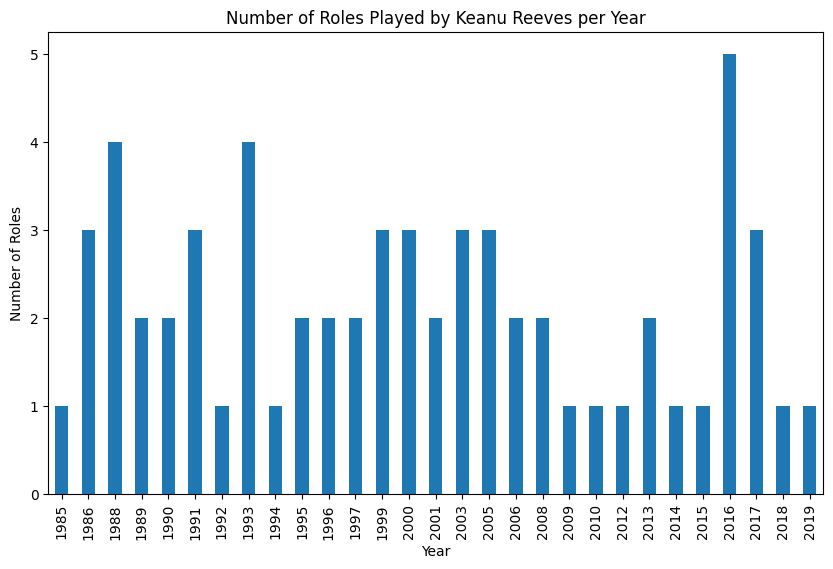

In [119]:
import matplotlib.pyplot as plt

# Group by year and count the number of roles
roles_per_year = sorted_KR_df.groupby('year').size()

# Plot the number of roles per year
roles_per_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Roles Played by Keanu Reeves per Year')
plt.show()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


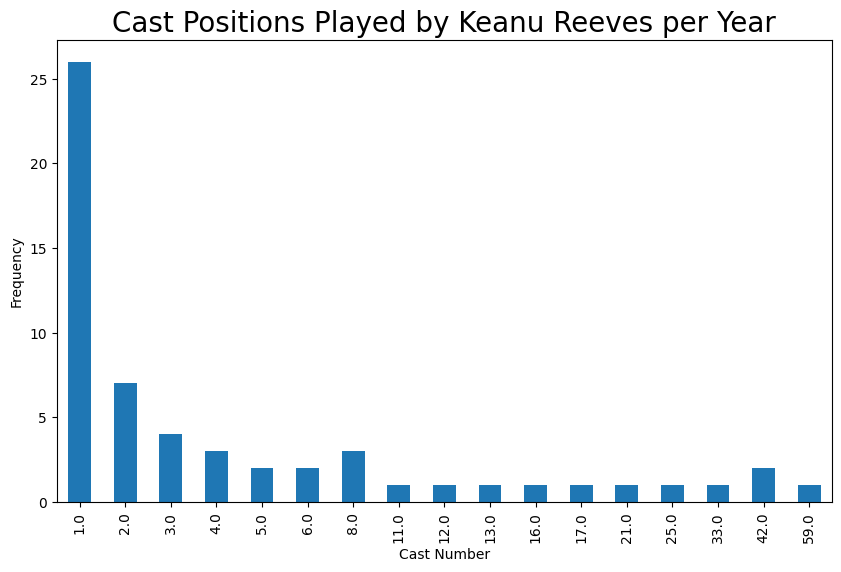

In [125]:
# Group by n-value and count the number of roles
n_per_year = sorted_KR_df.groupby('n').size()

# Plot the number of roles per year
n_per_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cast Number')
plt.ylabel('Frequency')
plt.title('Cast Positions Played by Keanu Reeves per Year', fontdict={'fontsize': 20})
plt.show()

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

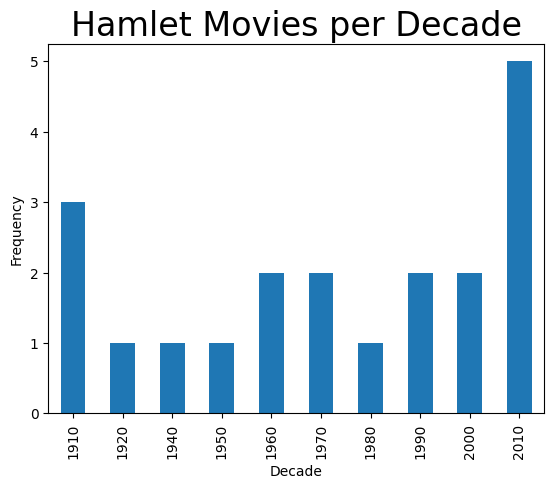

In [138]:
sorted_hamlet = sorted_movies[(sorted_movies['title'] == 'Hamlet')]

hamlet_per_decade = sorted_hamlet.groupby('decade').size()

hamlet_per_decade.plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.title('Hamlet Movies per Decade', fontdict = {'fontsize': 24})
plt.show()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [153]:
cast_decade = cast.sort_values(by='year')
cast_decade['decade'] = cast_decade.year / 10
cast_decade['decade'] = cast_decade['decade'].astype(int)
cast_decade['decade'] = cast_decade['decade'] * 10

lead_roles = cast_decade[(cast_decade['n'] == 1)]
leading_roles_per_decade = lead_roles['decade'].value_counts()

print(leading_roles_per_decade.loc[leading_roles_per_decade.index == 1960])



1960    9344
Name: decade, dtype: int64


In [154]:
print(leading_roles_per_decade.loc[leading_roles_per_decade.index == 2000])

2000    21161
Name: decade, dtype: int64


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [158]:
cast.head()

frank_oz_films = cast[cast['name'] == 'Frank Oz']

# Group by film and count the number of roles
roles_per_film = frank_oz_films.groupby('title').size()

# Filter for films with more than one role
films_with_multiple_roles = roles_per_film[roles_per_film > 1]

# Sort by year in ascending order
films_with_multiple_roles_sorted = films_with_multiple_roles.sort_values(ascending=True)

# Print the list of films
print(films_with_multiple_roles_sorted)

title
An American Werewolf in London          2
The Dark Crystal                        2
Follow That Bird                        3
The Adventures of Elmo in Grouchland    3
Muppet Treasure Island                  4
Muppets from Space                      4
The Great Muppet Caper                  6
The Muppet Christmas Carol              7
The Muppets Take Manhattan              7
The Muppet Movie                        8
dtype: int64


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [162]:
frank_oz_characters = frank_oz_films.groupby('character').size()
repeat_characters = frank_oz_characters[frank_oz_characters >= 2]
repeat_characters_sorted = repeat_characters.sort_values(ascending=True)

repeat_characters_sorted

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: >

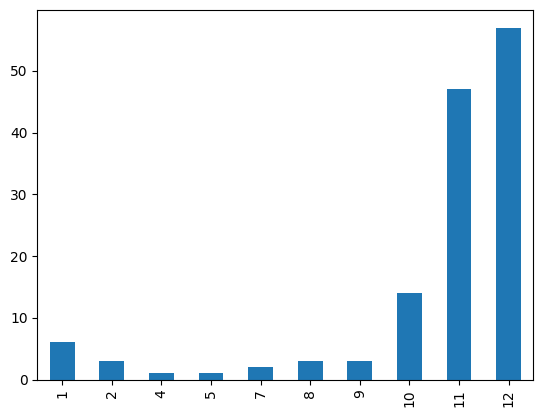

In [165]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

Text(0.5, 0, 'Month')

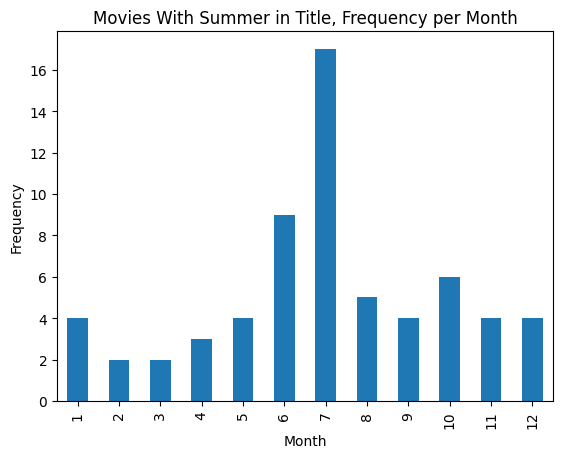

In [167]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Movies With Summer in Title, Frequency per Month')
plt.ylabel('Frequency')
plt.xlabel('Month')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<ipython-input-171-460fcf08ae95>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Action.date.dt.week.value_counts().sort_index().plot(kind='bar')


Text(0.5, 0, 'Week')

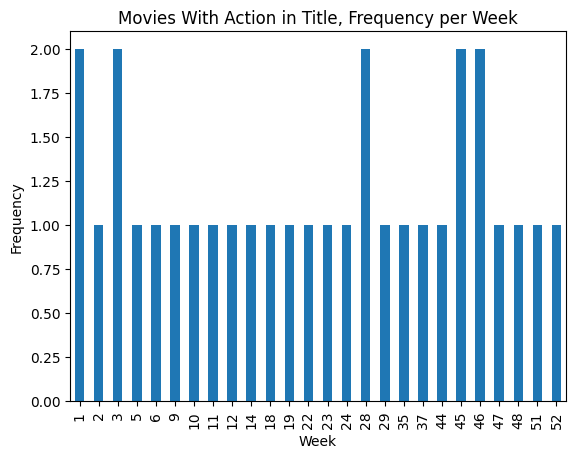

In [171]:
Action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
Action.date.dt.week.value_counts().sort_index().plot(kind='bar')

plt.title('Movies With Action in Title, Frequency per Week')
plt.ylabel('Frequency')
plt.xlabel('Week')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [189]:
keanu_lead_roles = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1)]
merged_data = keanu_lead_roles.merge(release_dates, on='title')
filtered_data = merged_data[(merged_data['country'] == 'USA')]
filtered_data['date'] = filtered_data['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

for index, row in filtered_data.iterrows():
    print('Title: ',  row['title'], '  Country:', row['country'], '  Release Date:',  row['date'], '\n')


Title:  47 Ronin   Country: USA   Release Date: 2013-12-25 

Title:  A Walk in the Clouds   Country: USA   Release Date: 1995-08-11 

Title:  Bill & Ted's Bogus Journey   Country: USA   Release Date: 1991-07-19 

Title:  Bill & Ted's Excellent Adventure   Country: USA   Release Date: 1989-02-17 

Title:  Chain Reaction   Country: USA   Release Date: 1996-08-02 

Title:  Constantine   Country: USA   Release Date: 2005-02-18 

Title:  Feeling Minnesota   Country: USA   Release Date: 1996-09-13 

Title:  Hard Ball   Country: USA   Release Date: 2001-09-14 

Title:  John Wick   Country: USA   Release Date: 2014-10-24 

Title:  John Wick: Chapter 2   Country: USA   Release Date: 2017-02-10 

Title:  Johnny Mnemonic   Country: USA   Release Date: 1995-05-26 

Title:  Knock Knock   Country: USA   Release Date: 2015-10-09 

Title:  Knock Knock   Country: USA   Release Date: 2017-10-06 

Title:  Little Buddha   Country: USA   Release Date: 1994-05-25 

Title:  Speed   Country: USA   Release Dat

<ipython-input-189-31bdc062dafe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['date'].apply(lambda x: x.strftime('%Y-%m-%d'))


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

Text(0.5, 0, 'Month')

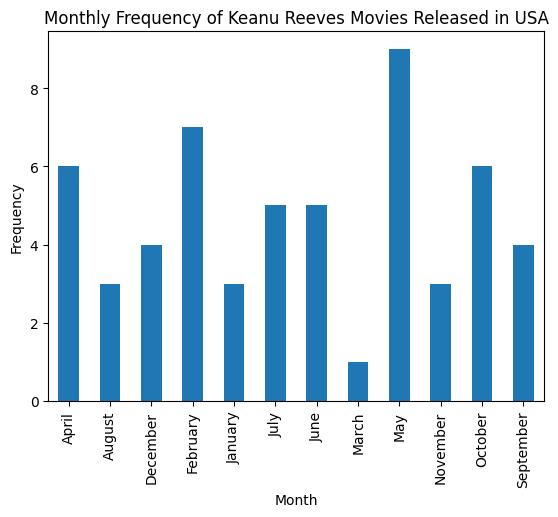

In [197]:
import datetime
keanu_merged = KR_df.merge(release_dates, on='title')
keanu_merged['month'] = keanu_merged['date'].dt.month
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
keanu_merged['month'] = keanu_merged['month'].apply(lambda x: month_names[x])
keanu_filtered = keanu_merged[(keanu_merged['country'] == 'USA')]

keanu_filtered

keanu_grouped = keanu_filtered.groupby('month').size()

keanu_grouped.plot(kind='bar')
plt.title('Monthly Frequency of Keanu Reeves Movies Released in USA')
plt.ylabel('Frequency')
plt.xlabel('Month')


### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

Text(0.5, 0, 'Year')

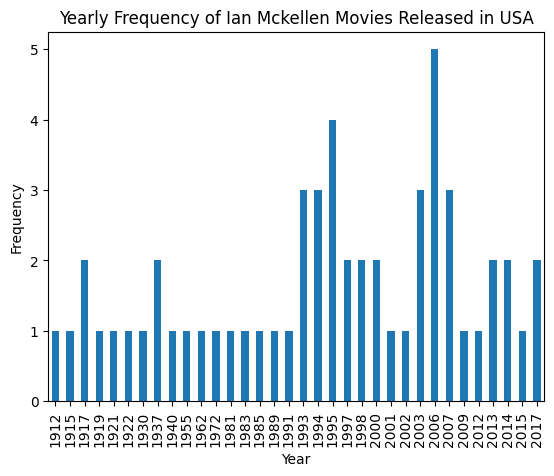

In [204]:
IM_df = cast[(cast['name'] == 'Ian McKellen')]

ian_mckellen_merged = IM_df.merge(release_dates, on='title')
ian_mckellen_filtered = ian_mckellen_merged[(ian_mckellen_merged['country'] == 'USA')]

ian_mckellen_filtered

ian_mckellen_grouped = ian_mckellen_filtered.groupby('year_y').size()

ian_mckellen_grouped.plot(kind='bar')
plt.title('Yearly Frequency of Ian Mckellen Movies Released in USA')
plt.ylabel('Frequency')
plt.xlabel('Year')